In [1]:
import os
import glob
from matplotlib.colors import Normalize, CenteredNorm
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import xarray as xr

In [2]:
os.listdir('/scratch-shared/slingbeek2/')

['tas.Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc',
 'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.TREFHT.206901-210012.nc',
 'b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.TREFHT.201901-206812.nc']

In [3]:
ds1 = xr.open_dataset('/scratch-shared/slingbeek2/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.TREFHT.201901-206812.nc')
ds2 = xr.open_dataset('/scratch-shared/slingbeek2/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.TREFHT.206901-210012.nc')
ds3 = xr.open_dataset('/scratch-shared/slingbeek2/tas.Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc')

/home/jasperdj/.conda/envs/geo/lib/python3.9/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
time1 = ('time', ds1.time_bnds.mean('nbnd').data, ds1.time.attrs)
time2 = ('time', ds2.time_bnds.mean('nbnd').data, ds2.time.attrs)
time3 = ('time', ds3.time_bnds.mean('nbnd').data, ds3.time.attrs)
ds1 = ds1.assign_coords({'time1':time1}).swap_dims({'time':'time1'}).drop_vars('time').rename({'time1':'time'})
ds2 = ds2.assign_coords({'time2':time2}).swap_dims({'time':'time2'}).drop_vars('time').rename({'time2':'time'})
ds3 = ds3.assign_coords({'time3':time3}).swap_dims({'time':'time3'}).drop_vars('time').rename({'time3':'time'})

### Control: end - start

In [5]:
dsi = ds3.sel(time=slice('2020','2029')); label1 = 'ref'; var1 = 'tas'
dsf = ds3.sel(time=slice('2090','2099')); label2 = 'cnt'; var2 = 'tas'

# simple check to see if time.dt.month is as expected
nyears = 10 # slice end inclusive
print((dsi.time.dt.month == list(range(1,13))*nyears).all().item(), (dsf.time.dt.month == list(range(1,13))*nyears).all().item())

ds1m = {
    'annual':dsi.mean('time', keep_attrs=True),
    'DJF':dsi.isel(time=dsi.time.dt.season=='DJF').mean('time', keep_attrs=True),
    'JJA':dsi.isel(time=dsi.time.dt.season=='JJA').mean('time', keep_attrs=True)
}
ds2m = {
    'annual':dsf.mean('time', keep_attrs=True),
    'DJF':dsf.isel(time=dsf.time.dt.season=='DJF').mean('time', keep_attrs=True),
    'JJA':dsf.isel(time=dsf.time.dt.season=='JJA').mean('time', keep_attrs=True)
}

plot_kw = {'transform':ccrs.PlateCarree(), 'cmap':'cmo.thermal', 'norm':Normalize(vmin=250, vmax=310)}
diffplot_kw = {'transform':ccrs.PlateCarree(), 'cmap':'cmo.balance', 'norm':CenteredNorm()}

True True


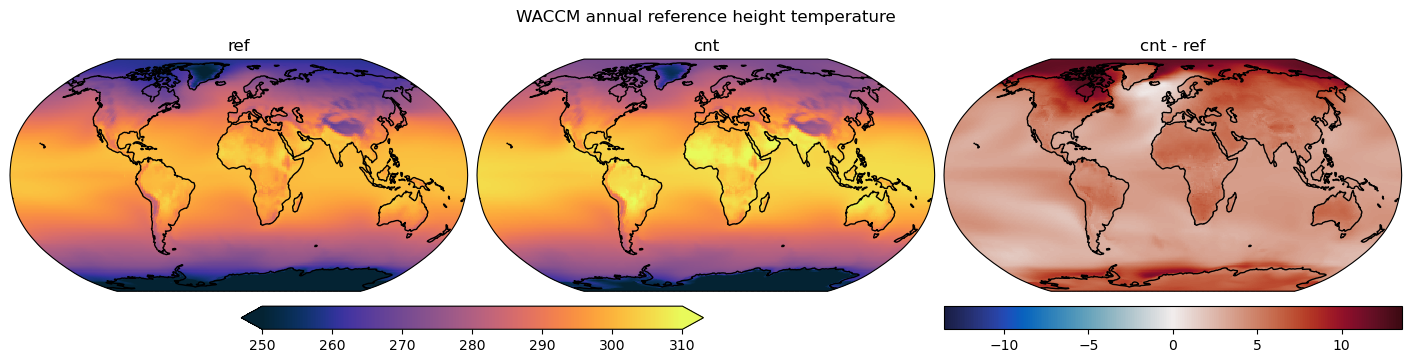

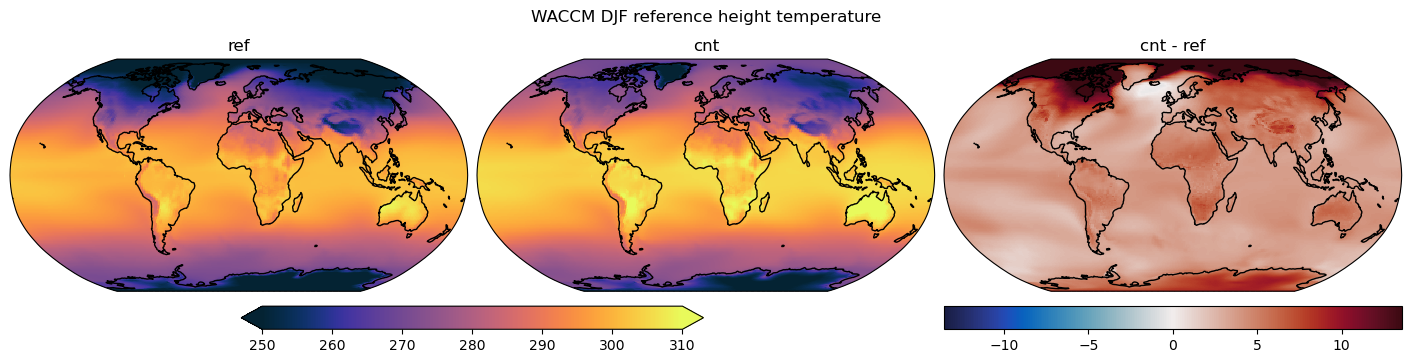

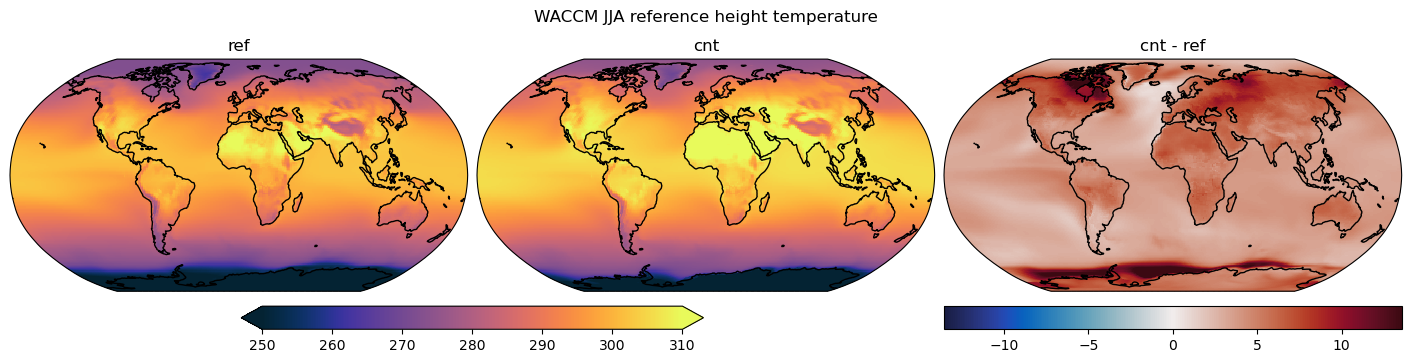

In [6]:
%matplotlib inline

for season in ['annual', 'DJF', 'JJA']:
    fig, ax = plt.subplots(1,3, figsize=(14,3.5), constrained_layout=True, subplot_kw={'projection':ccrs.Robinson()})
    Z1 = ds1m[season][var1]
    Z2 = ds2m[season][var2]
    Z3 = Z2 - Z1
    p1 = ax[0].pcolormesh(Z1.lon, Z1.lat, Z1, **plot_kw)
    p1 = ax[1].pcolormesh(Z2.lon, Z2.lat, Z2, **plot_kw)
    p3 = ax[2].pcolormesh(Z3.lon, Z3.lat, Z3, **diffplot_kw)
    plt.colorbar(p1, ax=ax[0:2], orientation='horizontal', shrink=0.5, extend='both')
    plt.colorbar(p3, ax=ax[2], orientation='horizontal')
    ax[0].set_title(f'{label1}'); ax[0].coastlines()
    ax[1].set_title(f'{label2}'); ax[1].coastlines()
    ax[2].set_title(f'{label2} - {label1}'); ax[2].coastlines()
    fig.suptitle(f'WACCM {season} reference height temperature')

### Geo: end - start

In [7]:
dsi = ds1.sel(time=slice('2020','2029')); label1 = 'ref'; var1 = 'TREFHT'
dsf = ds2.sel(time=slice('2090','2099')); label2 = 'geo'; var2 = 'TREFHT'

# simple check to see if time.dt.month is as expected
nyears = 10 # slice end inclusive
print((dsi.time.dt.month == list(range(1,13))*nyears).all().item(), (dsf.time.dt.month == list(range(1,13))*nyears).all().item())

ds1m = {
    'annual':dsi.mean('time', keep_attrs=True),
    'DJF':dsi.isel(time=dsi.time.dt.season=='DJF').mean('time', keep_attrs=True),
    'JJA':dsi.isel(time=dsi.time.dt.season=='JJA').mean('time', keep_attrs=True)
}
ds2m = {
    'annual':dsf.mean('time', keep_attrs=True),
    'DJF':dsf.isel(time=dsf.time.dt.season=='DJF').mean('time', keep_attrs=True),
    'JJA':dsf.isel(time=dsf.time.dt.season=='JJA').mean('time', keep_attrs=True)
}

plot_kw = {'transform':ccrs.PlateCarree(), 'cmap':'cmo.thermal', 'norm':Normalize(vmin=250, vmax=310)}
diffplot_kw = {'transform':ccrs.PlateCarree(), 'cmap':'cmo.balance', 'norm':CenteredNorm()}

True True


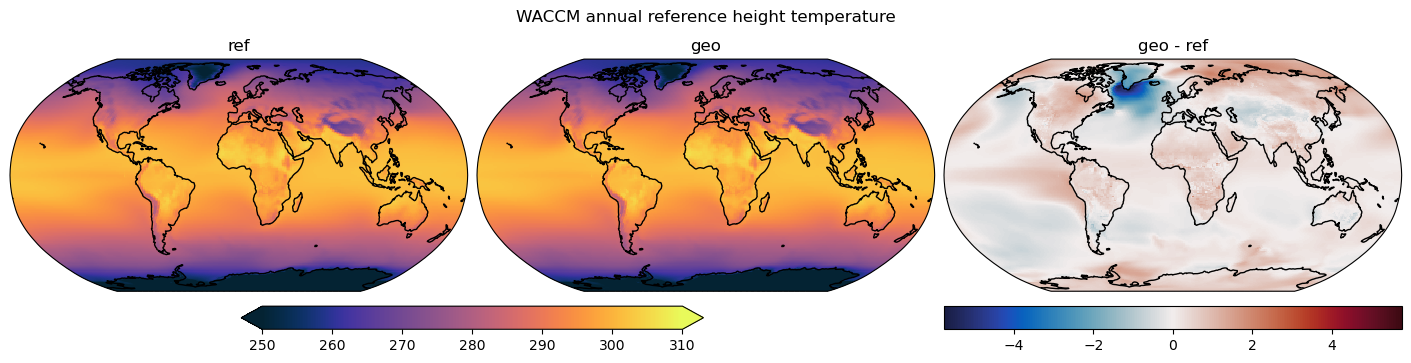

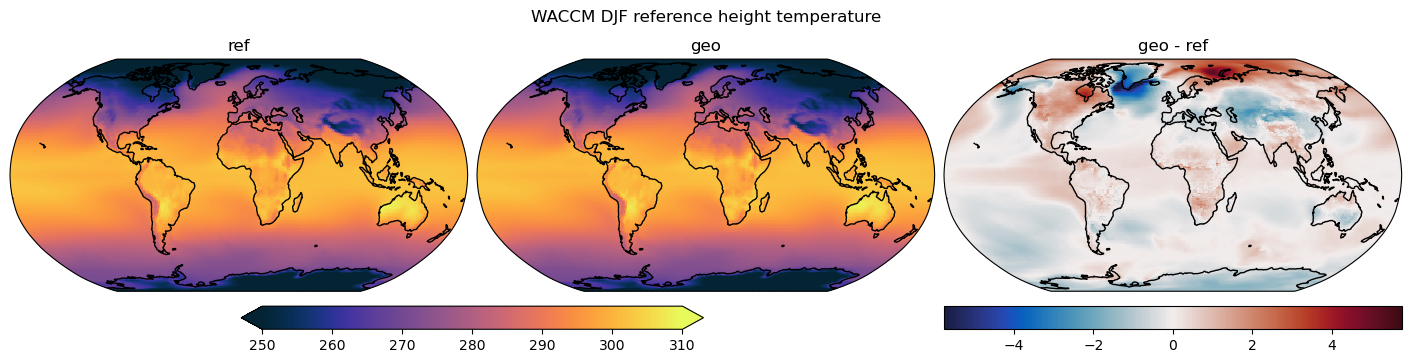

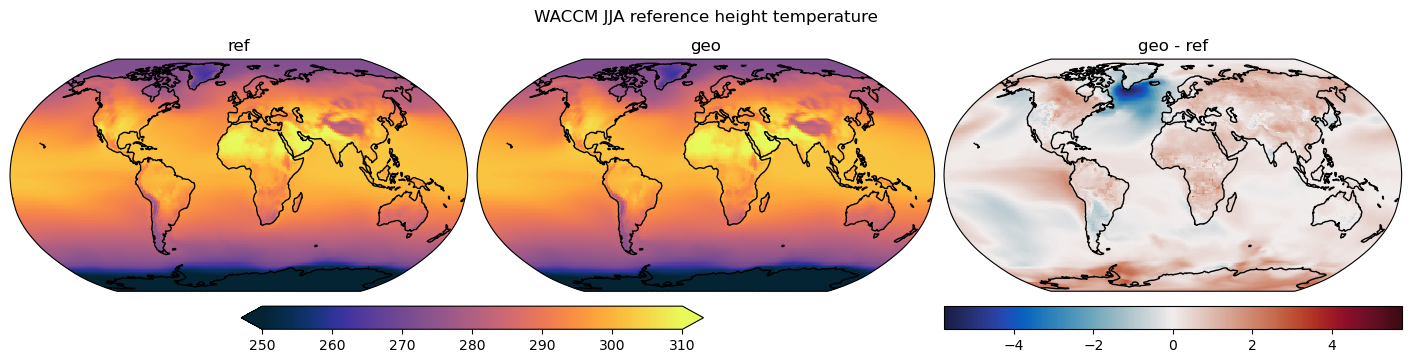

In [8]:
%matplotlib inline

for season in ['annual', 'DJF', 'JJA']:
    fig, ax = plt.subplots(1,3, figsize=(14,3.5), constrained_layout=True, subplot_kw={'projection':ccrs.Robinson()})
    Z1 = ds1m[season][var1]
    Z2 = ds2m[season][var2]
    Z3 = Z2 - Z1
    p1 = ax[0].pcolormesh(Z1.lon, Z1.lat, Z1, **plot_kw)
    p1 = ax[1].pcolormesh(Z2.lon, Z2.lat, Z2, **plot_kw)
    p3 = ax[2].pcolormesh(Z3.lon, Z3.lat, Z3, **diffplot_kw)
    plt.colorbar(p1, ax=ax[0:2], orientation='horizontal', shrink=0.5, extend='both')
    plt.colorbar(p3, ax=ax[2], orientation='horizontal')
    ax[0].set_title(f'{label1}'); ax[0].coastlines()
    ax[1].set_title(f'{label2}'); ax[1].coastlines()
    ax[2].set_title(f'{label2} - {label1}'); ax[2].coastlines()
    fig.suptitle(f'WACCM {season} reference height temperature')

### Geo end - Cnt start

In [9]:
dsi = ds3.sel(time=slice('2020','2029')); label1 = 'ref'; var1 = 'tas'
dsf = ds2.sel(time=slice('2090','2099')); label2 = 'geo'; var2 = 'TREFHT'

# simple check to see if time.dt.month is as expected
nyears = 10 # slice end inclusive
print((dsi.time.dt.month == list(range(1,13))*nyears).all().item(), (dsf.time.dt.month == list(range(1,13))*nyears).all().item())

ds1m = {
    'annual':dsi.mean('time', keep_attrs=True),
    'DJF':dsi.isel(time=dsi.time.dt.season=='DJF').mean('time', keep_attrs=True),
    'JJA':dsi.isel(time=dsi.time.dt.season=='JJA').mean('time', keep_attrs=True)
}
ds2m = {
    'annual':dsf.mean('time', keep_attrs=True),
    'DJF':dsf.isel(time=dsf.time.dt.season=='DJF').mean('time', keep_attrs=True),
    'JJA':dsf.isel(time=dsf.time.dt.season=='JJA').mean('time', keep_attrs=True)
}

plot_kw = {'transform':ccrs.PlateCarree(), 'cmap':'cmo.thermal', 'norm':Normalize(vmin=250, vmax=310)}
diffplot_kw = {'transform':ccrs.PlateCarree(), 'cmap':'cmo.balance', 'norm':CenteredNorm()}

True True


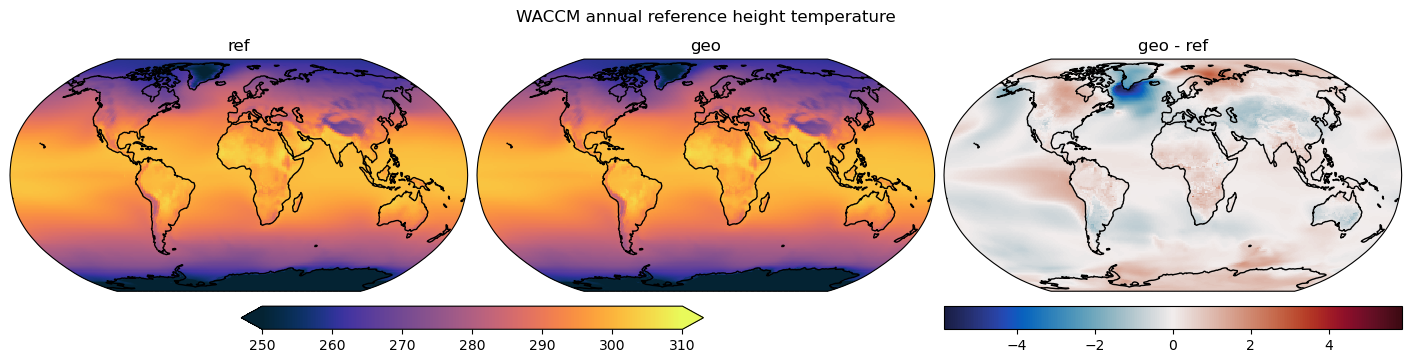

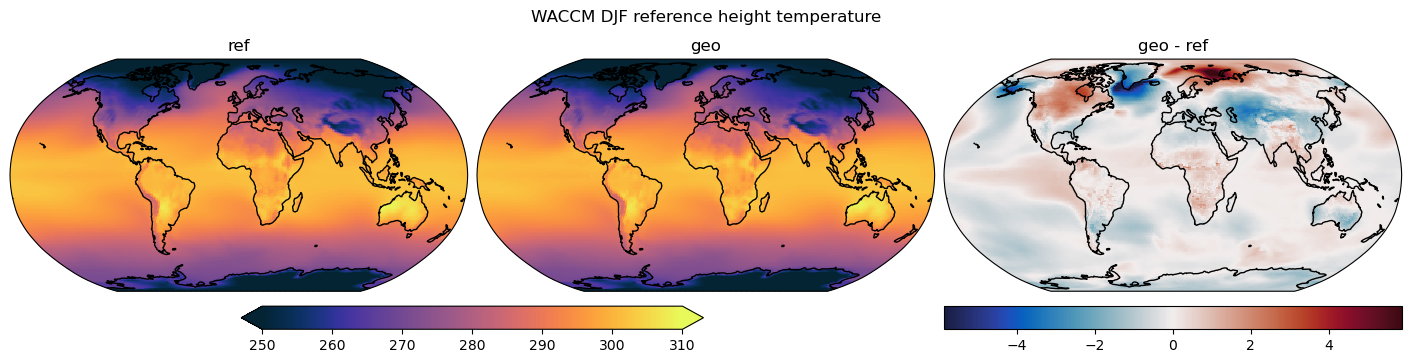

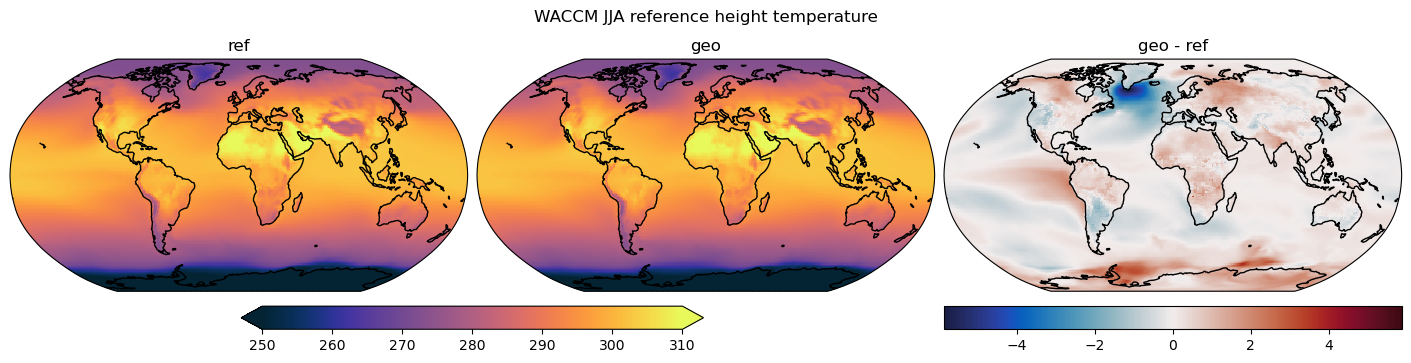

In [10]:
%matplotlib inline

for season in ['annual', 'DJF', 'JJA']:
    fig, ax = plt.subplots(1,3, figsize=(14,3.5), constrained_layout=True, subplot_kw={'projection':ccrs.Robinson()})
    Z1 = ds1m[season][var1]
    Z2 = ds2m[season][var2]
    Z3 = Z2 - Z1
    p1 = ax[0].pcolormesh(Z1.lon, Z1.lat, Z1, **plot_kw)
    p1 = ax[1].pcolormesh(Z2.lon, Z2.lat, Z2, **plot_kw)
    p3 = ax[2].pcolormesh(Z3.lon, Z3.lat, Z3, **diffplot_kw)
    plt.colorbar(p1, ax=ax[0:2], orientation='horizontal', shrink=0.5, extend='both')
    plt.colorbar(p3, ax=ax[2], orientation='horizontal')
    ax[0].set_title(f'{label1}'); ax[0].coastlines()
    ax[1].set_title(f'{label2}'); ax[1].coastlines()
    ax[2].set_title(f'{label2} - {label1}'); ax[2].coastlines()
    fig.suptitle(f'WACCM {season} reference height temperature')